In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeavePOut, LeaveOneOut
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# Read the data
df = pd.read_csv("/content/student_dropout.csv")

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
df.rename(columns = {'Age at enrollment':'Age'}, inplace = True)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [ ]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
df['Target'] = df['Target'].map(lambda x: 1 if x == "Dropout" else 0)

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [ ]:
df["Target"].value_counts()

,count
Target,
0,3003
1,1421


# Exploratory Data Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


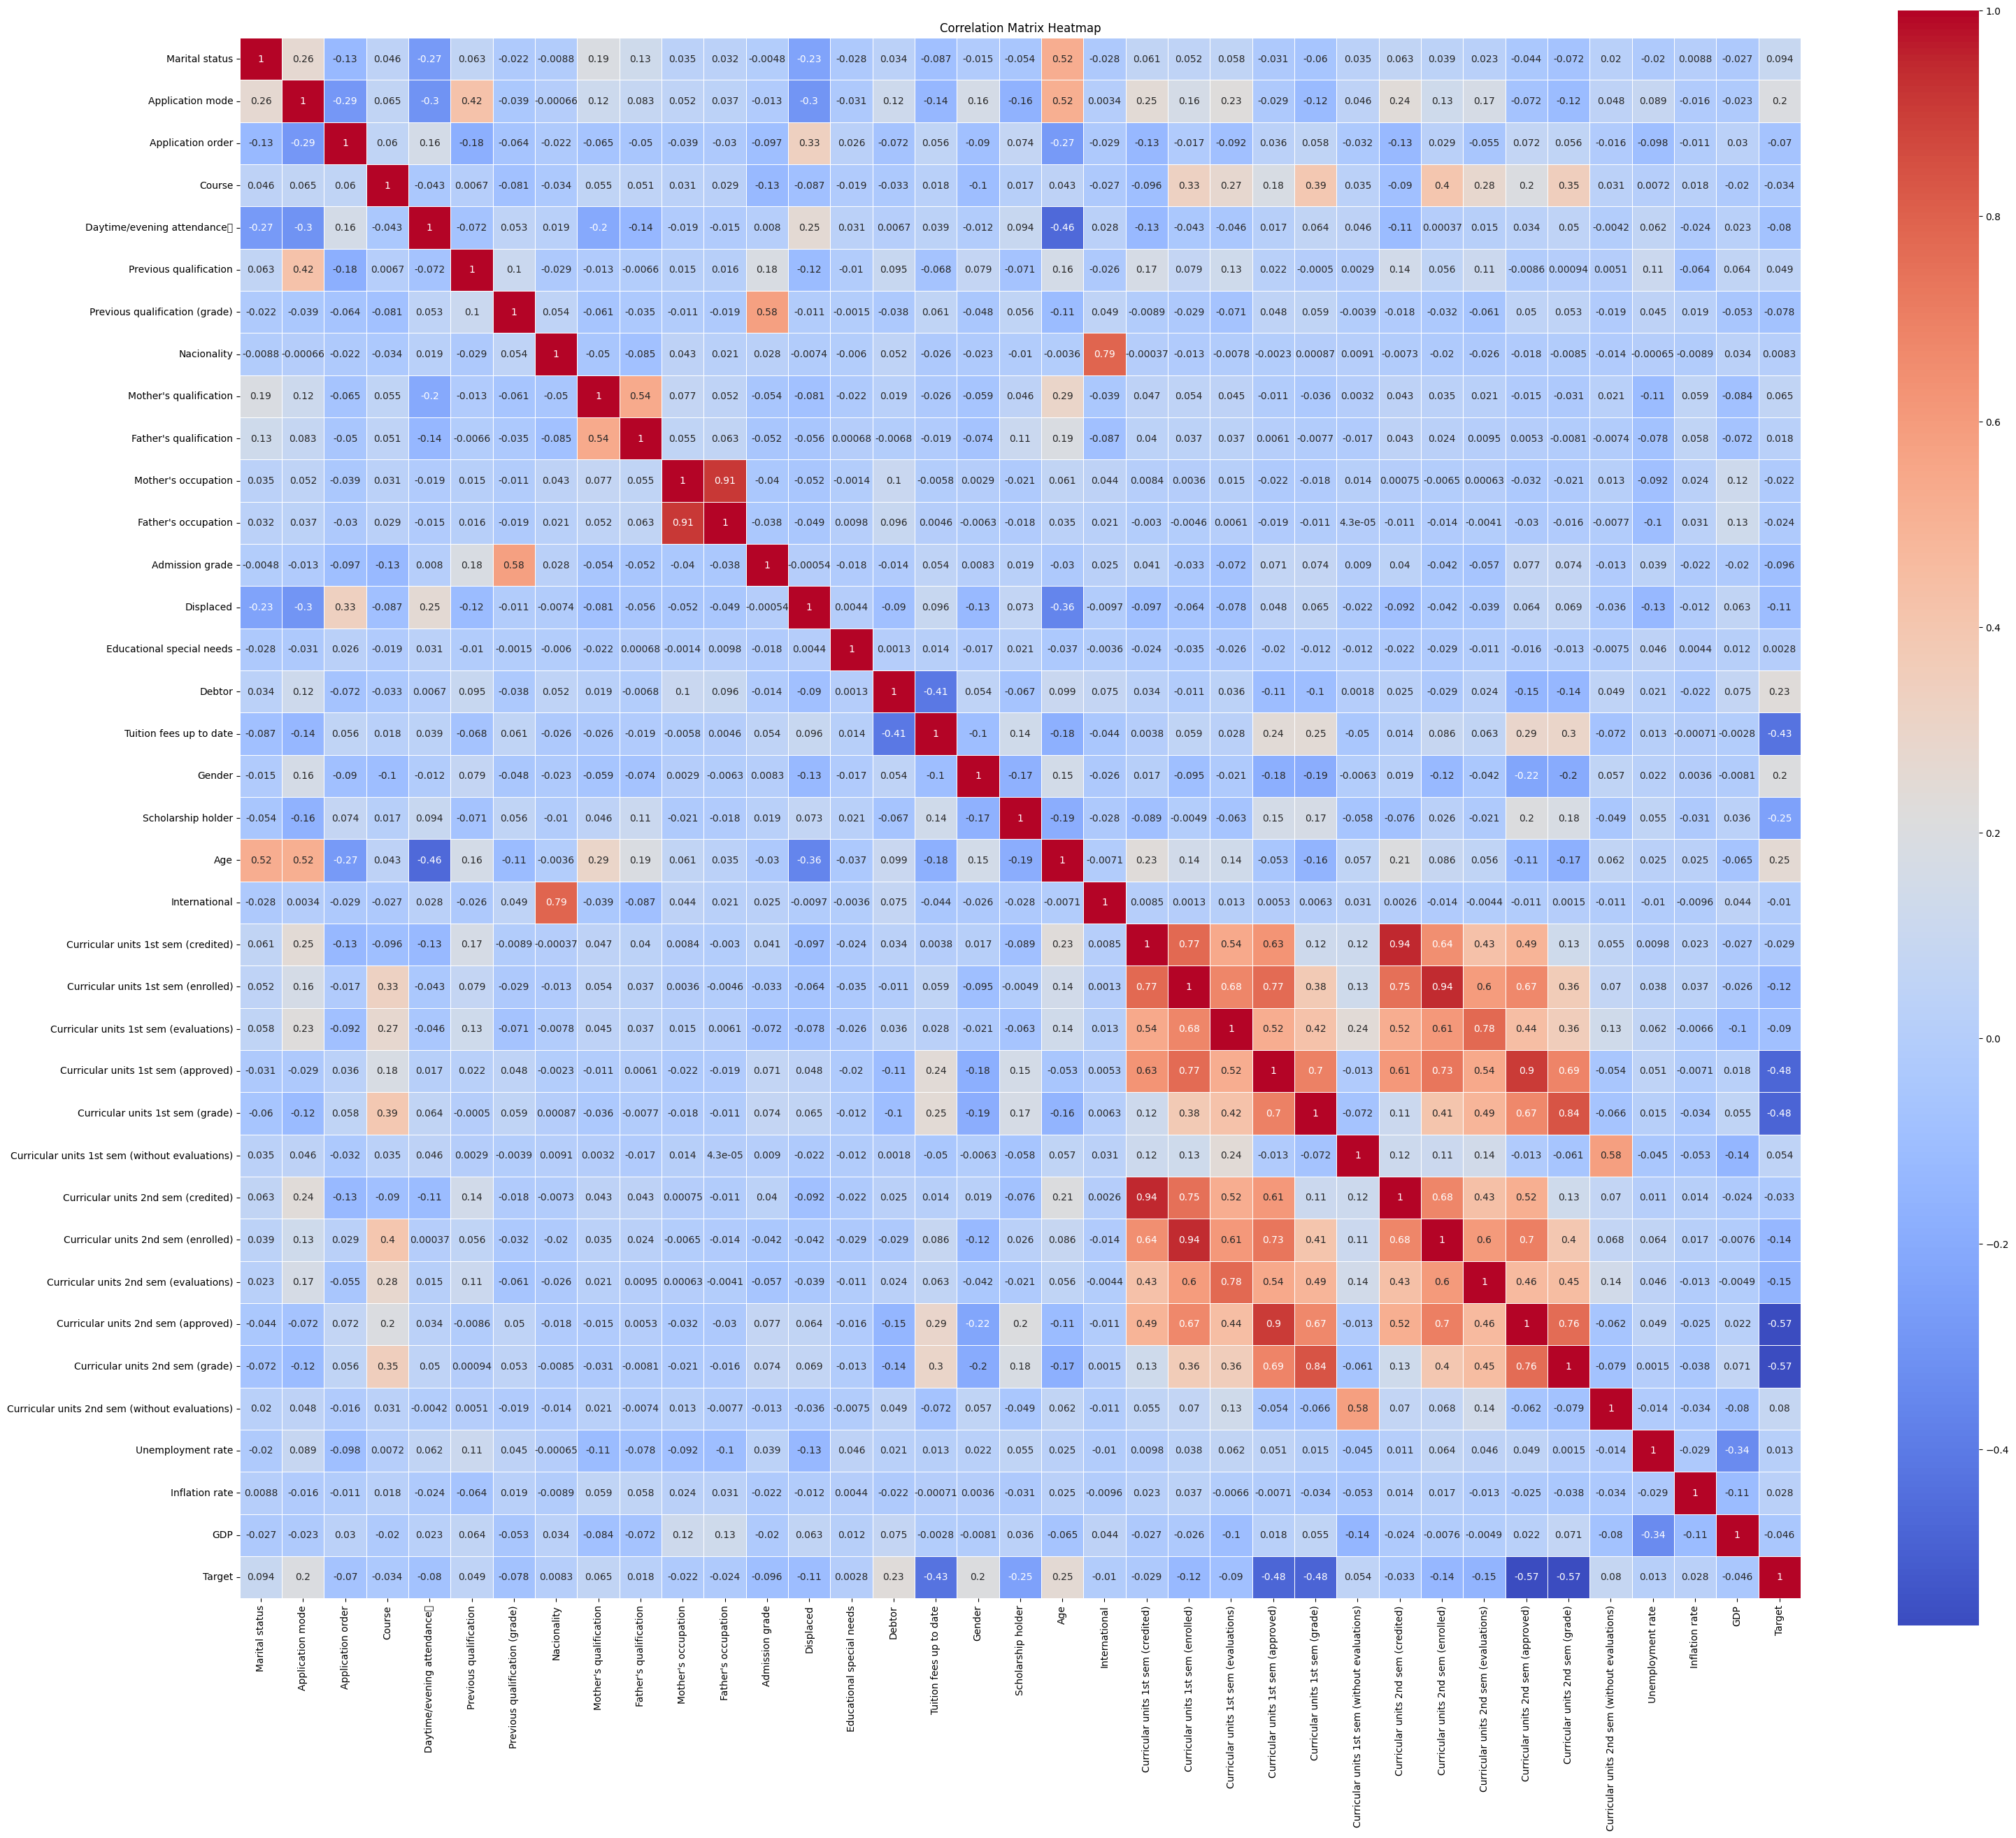

In [ ]:
#Correlation Matrix and Heatmap
corr = df.corr()
plt.figure(figsize = (36, 30))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidths = 0.5, square= True)
plt.title('Correlation Matrix Heatmap')

To decide which columns to remove based on low correlation with the target variable ('Target'), we can set a correlation threshold and remove columns with correlations below that threshold and columns that are likely not related to the students dropout. Here, we are removing columns with an absolute correlation coefficient less than 0.1

In [ ]:
# Get columns with correlation higher than or equal to 0.1
target_corr = corr['Target']
high_corr_cols = target_corr[target_corr.abs() > 0.1]
high_corr_cols

,Target
Application mode,0.198458
Displaced,-0.107232
Debtor,0.229407
Tuition fees up to date,-0.429149
Gender,0.203983
Scholarship holder,-0.245354
Age,0.254215
Curricular units 1st sem (enrolled),-0.124635
Curricular units 1st sem (approved),-0.479112
Curricular units 1st sem (grade),-0.480669


In [ ]:
df = df[high_corr_cols.index]

In [ ]:
data_corr_descending_values = df.corr()['Target'].sort_values(ascending = False)
data_corr_descending = pd.DataFrame(data_corr_descending_values)

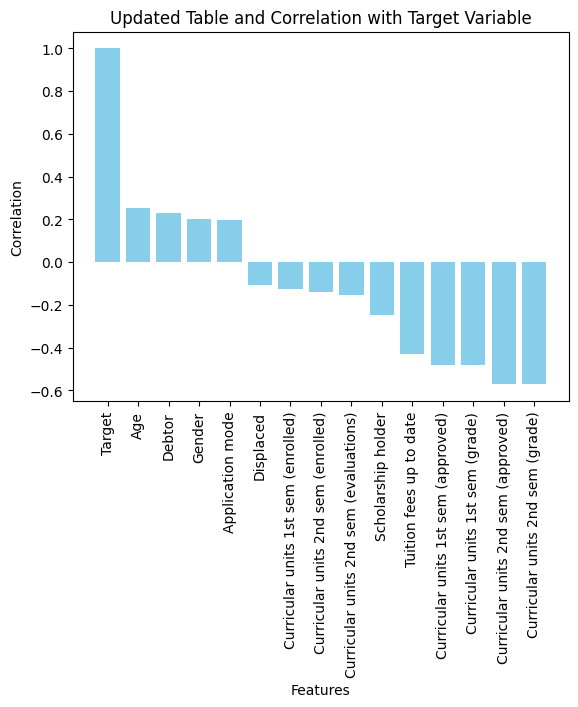

In [ ]:
plt.bar(data_corr_descending.index, data_corr_descending["Target"], color = 'skyblue')

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title('Updated Table and Correlation with Target Variable')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation = 90)

# Show the plot
plt.show()

In [ ]:
df['Target'].value_counts()

,count
Target,
0,3003
1,1421


In [ ]:
# Check for duplicates
df.duplicated().sum()

97

In [ ]:
# Remove duplicated values
df = df.drop_duplicates()
df.duplicated().sum()

0

<Axes: xlabel='Target', ylabel='count'>

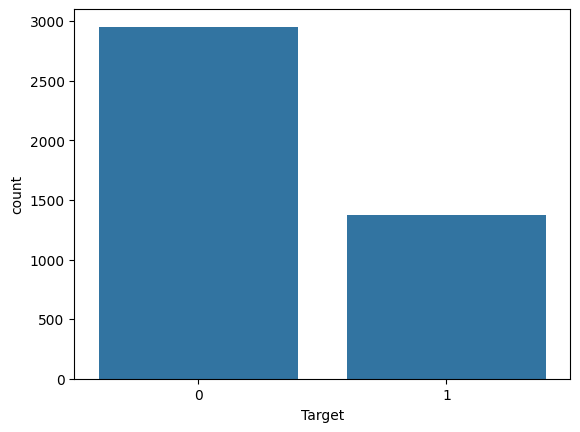

In [ ]:
sns.countplot(x = 'Target', data = df)

In [ ]:
df['Target'].value_counts()

,count
Target,
0,2953
1,1374


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Application mode,4327.0,18.909868,17.523782,1.0,1.000000,17.000000,39.000000,57.000000
Displaced,4327.0,0.542639,0.498236,0.0,0.000000,1.000000,1.000000,1.000000
Debtor,4327.0,0.115785,0.320003,0.0,0.000000,0.000000,0.000000,1.000000
Tuition fees up to date,4327.0,0.880055,0.324934,0.0,1.000000,1.000000,1.000000,1.000000
Gender,4327.0,0.351283,0.477426,0.0,0.000000,0.000000,1.000000,1.000000
Scholarship holder,4327.0,0.250982,0.433628,0.0,0.000000,0.000000,1.000000,1.000000
Age,4327.0,23.350589,7.635585,17.0,19.000000,20.000000,25.000000,70.000000
Curricular units 1st sem (enrolled),4327.0,6.359602,2.394344,0.0,5.000000,6.000000,7.000000,26.000000
Curricular units 1st sem (approved),4327.0,4.810723,3.047322,0.0,3.000000,5.000000,6.000000,26.000000
Curricular units 1st sem (grade),4327.0,10.876048,4.627739,0.0,11.166667,12.333333,13.407589,18.875000


In [ ]:
df.columns

Index(['Application mode', 'Displaced', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Target'],
      dtype='object')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Application mode,4327.0,18.909868,17.523782,1.0,1.000000,17.000000,39.000000,57.000000
Displaced,4327.0,0.542639,0.498236,0.0,0.000000,1.000000,1.000000,1.000000
Debtor,4327.0,0.115785,0.320003,0.0,0.000000,0.000000,0.000000,1.000000
Tuition fees up to date,4327.0,0.880055,0.324934,0.0,1.000000,1.000000,1.000000,1.000000
Gender,4327.0,0.351283,0.477426,0.0,0.000000,0.000000,1.000000,1.000000
Scholarship holder,4327.0,0.250982,0.433628,0.0,0.000000,0.000000,1.000000,1.000000
Age,4327.0,23.350589,7.635585,17.0,19.000000,20.000000,25.000000,70.000000
Curricular units 1st sem (enrolled),4327.0,6.359602,2.394344,0.0,5.000000,6.000000,7.000000,26.000000
Curricular units 1st sem (approved),4327.0,4.810723,3.047322,0.0,3.000000,5.000000,6.000000,26.000000
Curricular units 1st sem (grade),4327.0,10.876048,4.627739,0.0,11.166667,12.333333,13.407589,18.875000


In [ ]:
# decimal_cols = df[df.columns].max() > 1
# decimal_cols = decimal_cols[decimal_cols.values].index
decimal_cols = [col for col in df.columns if 1 < df[col].max()]

In [ ]:
decimal_cols

['Application mode',
 'Age',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)']

In [ ]:
len(decimal_cols)

9

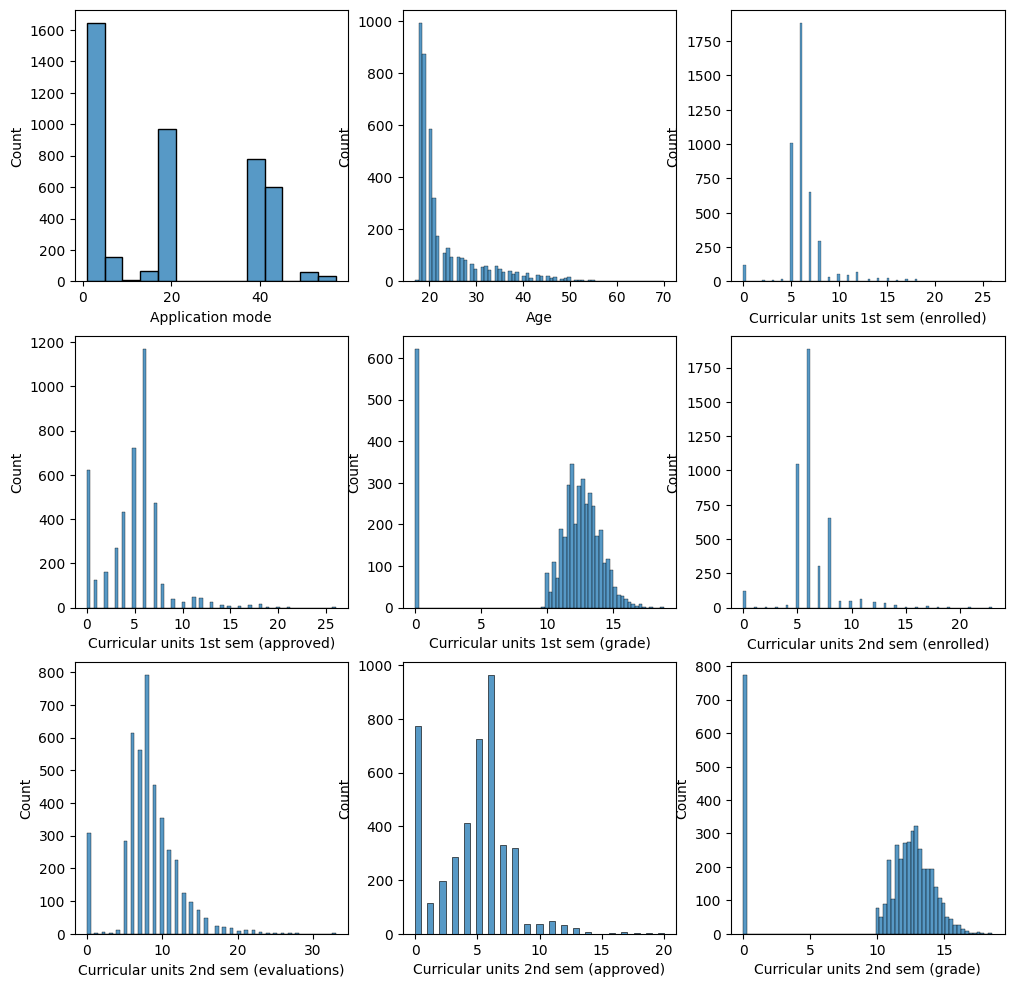

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
ax = ax.ravel()
for i, col in enumerate(decimal_cols):
  sns.histplot(x = df[col], ax = ax[i])
# plt.tight_layout()
plt.show()

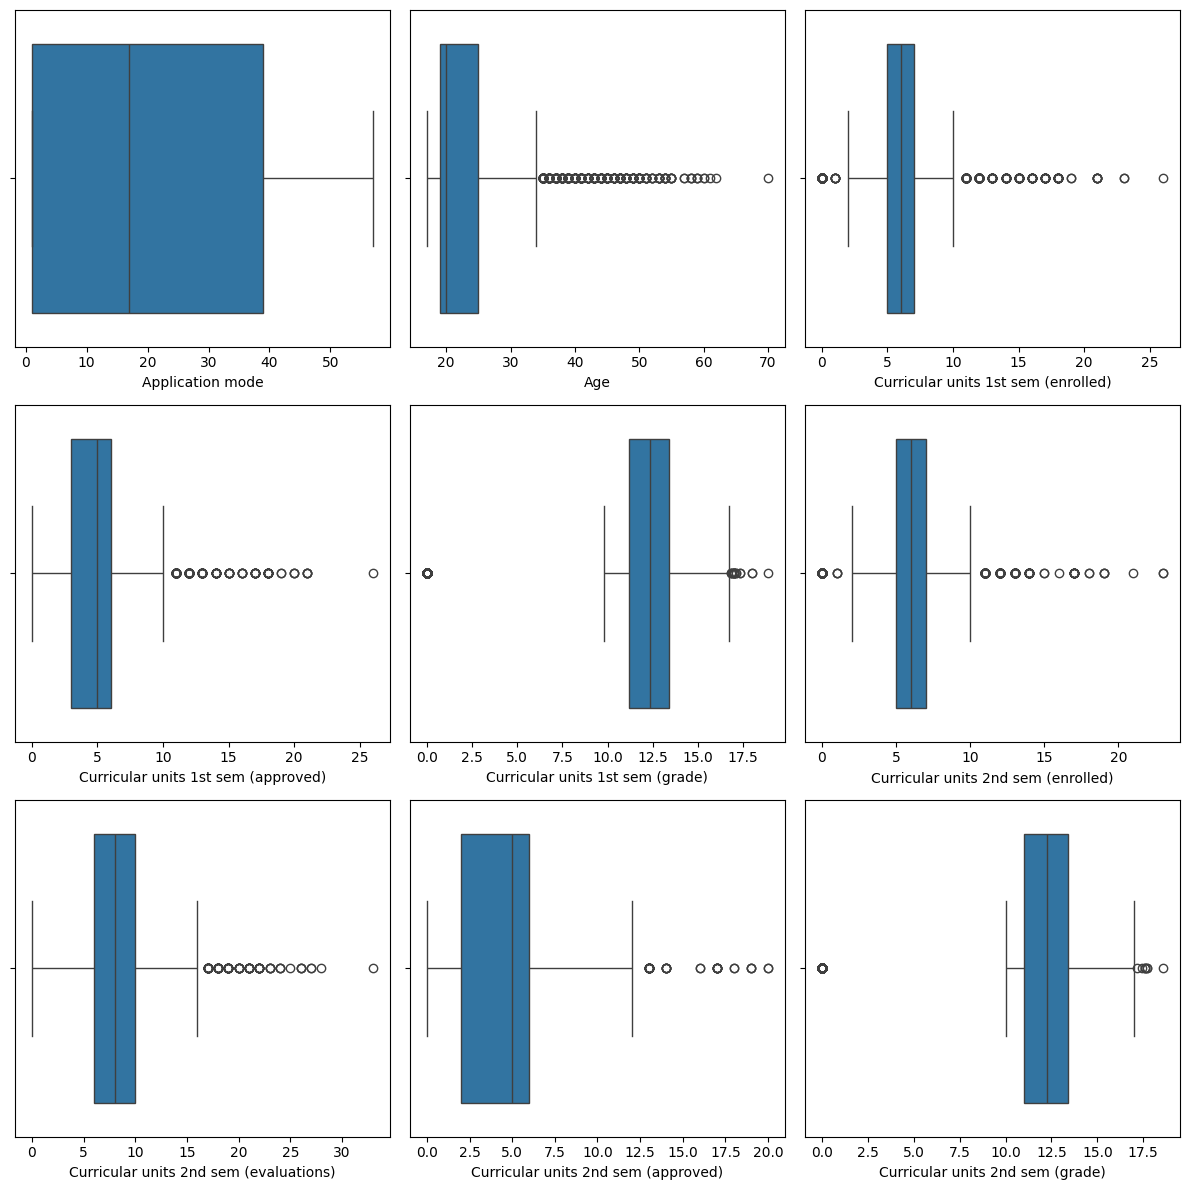

In [ ]:
# Check for outliers
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
# fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax = ax.ravel()
for i, col in enumerate(decimal_cols):
  sns.boxplot(x = df[col], ax = ax[i])
plt.tight_layout()
plt.show()

## Preprocessing

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# Scale the data
scale = RobustScaler()
df[decimal_cols] = scale.fit_transform(df[decimal_cols])

In [ ]:
# df[decimal_cols] = np.log1p(df[decimal_cols])

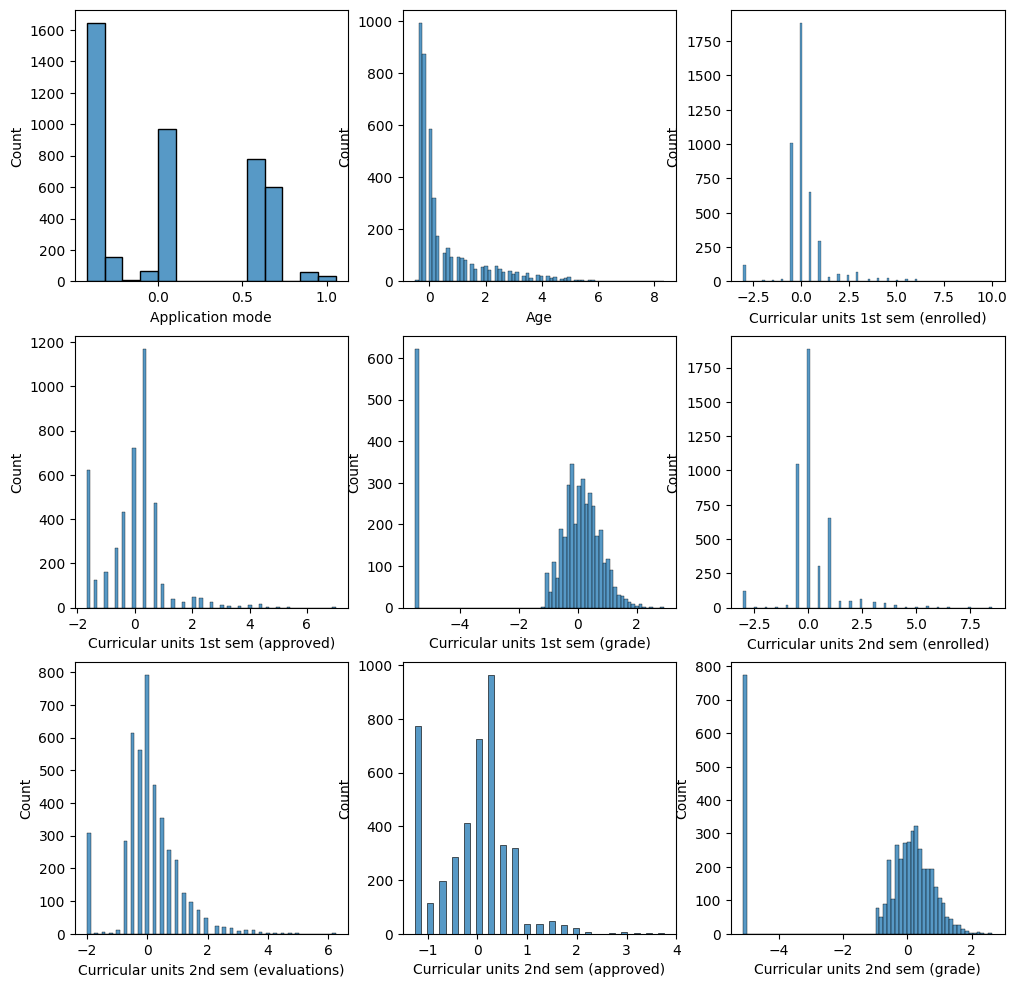

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
ax = ax.ravel()
for i, col in enumerate(decimal_cols):
  sns.histplot(x = df[col], ax = ax[i])
# plt.tight_layout()
plt.show()

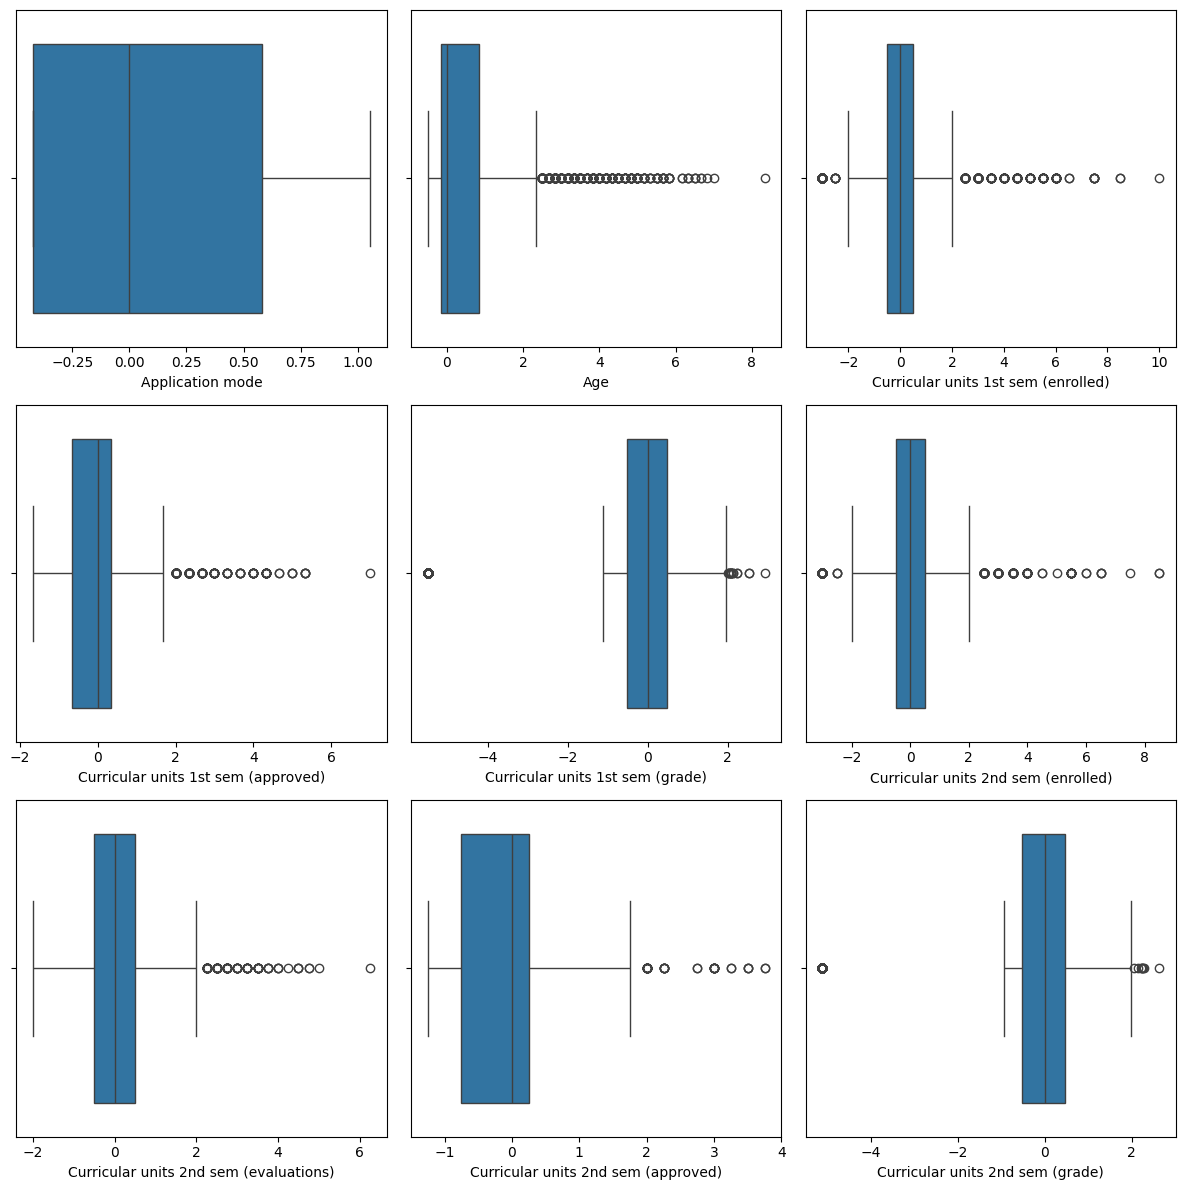

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
ax = ax.ravel()

for i, col in enumerate(decimal_cols):
  sns.boxplot(x = df[col], ax = ax[i])
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop('Target', axis = 1)
y = df['Target']

In [ ]:
# Spliting the dataset into traing and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 44, shuffle = True, stratify = y)

In [ ]:
y.value_counts()

,count
Target,
0,2953
1,1374


## Model Selection

### Random Forst

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_model = RandomForestClassifier(n_estimators = 60, criterion='entropy', random_state = 44)

In [ ]:
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
y_prob_class_1 = RF_model.predict_proba(X_test)[:, 1]

In [ ]:
# Test overfitting
print("Random Forest Train Score: ", RF_model.score(X_train, y_train))
print("Random Forest Test score: ", RF_model.score(X_test, y_test))

Random Forest Train Score:  0.9943502824858758
Random Forest Test score:  0.8914549653579676


#### Model Evaluation

In [ ]:
# k-Fold
k_folds = KFold(n_splits= 5, shuffle= True, random_state=42)
scores = cross_val_score(RF_model,X, y, cv=k_folds)
print(f"Average CV score: {scores.mean()}")

Average CV score: 0.8647980883471946


In [ ]:
# Stratified k-Fold
k_folds = StratifiedKFold(n_splits=5, shuffle= True, random_state= 42)
scores = cross_val_score(RF_model,X, y, cv=k_folds)
print(f"Average CV score: {scores.mean()}")

Average CV score: 0.863880708593093


Text(0.5, 1.0, 'Random Forest')

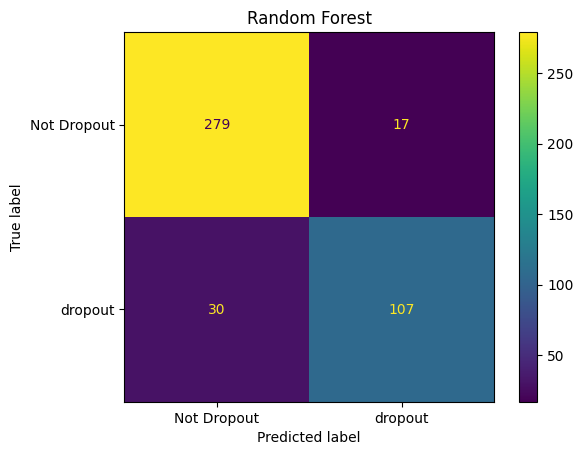

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Not Dropout", "dropout"])
disp.plot()
plt.title("Random Forest")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       296
           1       0.86      0.78      0.82       137

    accuracy                           0.89       433
   macro avg       0.88      0.86      0.87       433
weighted avg       0.89      0.89      0.89       433



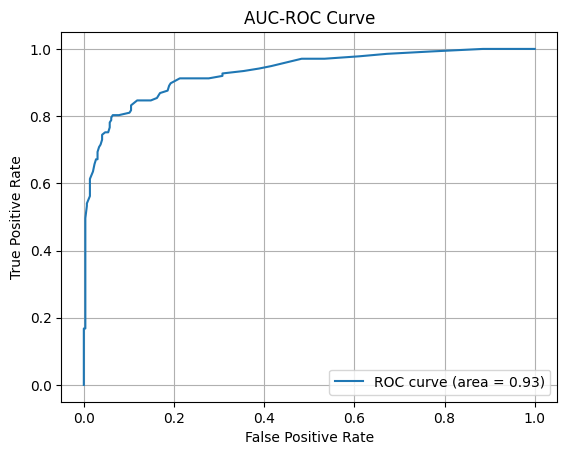

In [ ]:
fpr, tpr, thesholds = roc_curve(y_test, y_prob_class_1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = f"ROC curve (area = {roc_auc:0.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

In [ ]:
print(f'Random Forest Model AUC score: {roc_auc_score(y_test, y_prob_class_1)}')

Random Forest Model AUC score: 0.9316926415466562


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### Selecting best k value

Best K: 13, Accuracy: 85.13%


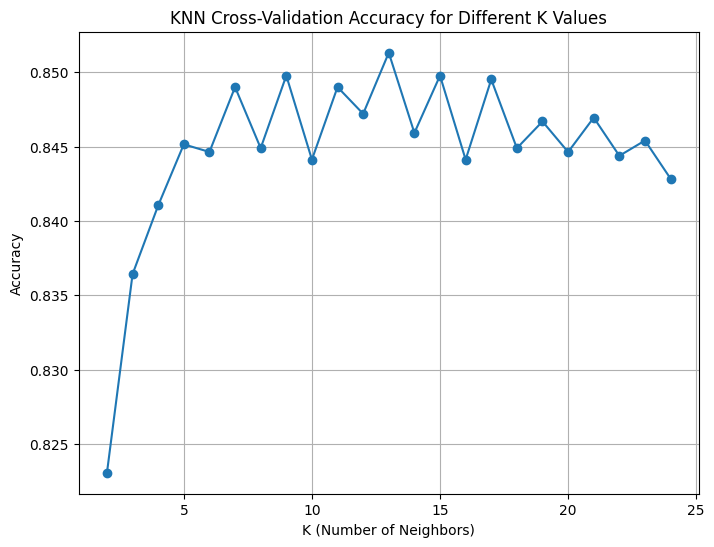

In [ ]:
k_values = list(range(2, 25))
cross_val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # cross validation if data in sequence, result the model no overfitting or no sequence (only pattern)
    scores = cross_val_score(knn,X_train, y_train, cv=5)  # Using 5-fold cross-validation
    cross_val_accuracies.append(scores.mean())

# Find the best K value
best_k = k_values[cross_val_accuracies.index(max(cross_val_accuracies))]
best_accuracy = max(cross_val_accuracies)

print(f"Best K: {best_k}, Accuracy: {best_accuracy * 100:.2f}%")

# Plot the cross-validation accuracy for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, cross_val_accuracies, marker='o', linestyle='-')
plt.title('KNN Cross-Validation Accuracy for Different K Values')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=13)

In [ ]:
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
y_prob_class_1 = KNN_model.predict_proba(X_test)[:, 1]

In [ ]:
# Test overfitting
print("Kneighbors Train Score: ", KNN_model.score(X_train, y_train))
print("Kneighbors Test score: ", KNN_model.score(X_test, y_test))

Kneighbors Train Score:  0.8659476117103235
Kneighbors Test score:  0.8775981524249422


#### Model Evaluation

In [ ]:
# k-Fold
k_folds = KFold(n_splits= 5, shuffle= True, random_state=42)
scores = cross_val_score(KNN_model,X, y, cv=k_folds)
print(f"Average CV score: {scores.mean()}")

Average CV score: 0.8525469569744623


In [ ]:
# Stratified k-Fold
k_folds = StratifiedKFold(n_splits=5, shuffle= True, random_state= 42)
scores = cross_val_score(KNN_model,X, y, cv=k_folds)
print(f"Average CV score: {scores.mean()}")

Average CV score: 0.8500132160354564


Text(0.5, 1.0, 'Kneighbors')

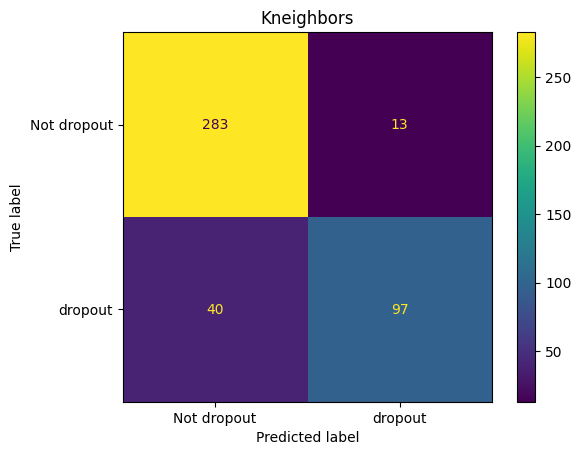

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Not dropout", "dropout"])
disp.plot()
plt.title("Kneighbors")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91       296
           1       0.88      0.71      0.79       137

    accuracy                           0.88       433
   macro avg       0.88      0.83      0.85       433
weighted avg       0.88      0.88      0.87       433



0.9255153876504242


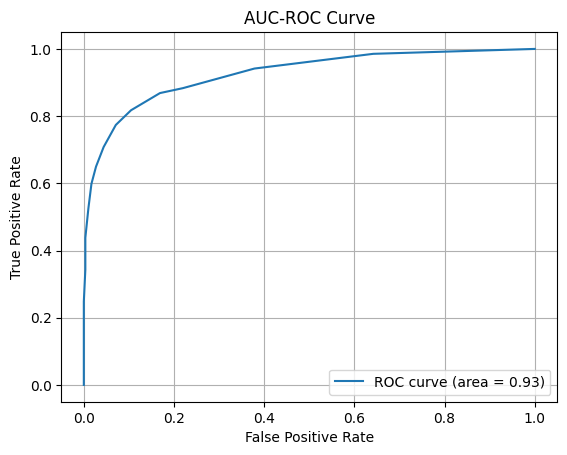

In [ ]:
fpr, tpr, thesholds = roc_curve(y_test, y_prob_class_1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = f"ROC curve (area = {roc_auc:0.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend(loc = 'lower right')
print(roc_auc)
plt.grid(True)

In [ ]:
# print(f'Kneighbors Model AUC score: {auc(fpr, tpr)}')
print(f'Kneighbors Model AUC score: {roc_auc_score(y_test, y_prob_class_1)}')

Kneighbors Model AUC score: 0.9255153876504242
